## Joseph El Kettaneh - SD


# TP1 - Séparation Linéaire avec Perceptron

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

X = pd.read_csv("data_tp1_app.txt",names=["Classe","x","y"],sep=" ")
Y = pd.read_csv("data_tp1_dec.txt",names=["Classe","x","y"],sep=" ")

    La fonction f se sera la frontière de décision  

In [ ]:
def f(x,a,b):
    return -(a * x) + b

    La method de perceptron avec One vs One qui valide si le produit du vecteur a et les vecteur des classes
    si le produit est <= 0 donc le point sera mal classer et on compute un nouveau vect a

In [41]:
def oneVsOne(X,Y):
    a= np.array([0, 0, 0])
    class1 = []
    class2 = []
    
    for i in range(len(X['x'])):
        class1.append(np.array([X['x'].tolist()[i],X['y'].tolist()[i],1]))
        class2.append(np.array([-Y['x'].tolist()[i],-Y['y'].tolist()[i], -1]))
        classes = class1 + class2
    
        
    a = classes[0]   
    isNeg = True
    while(isNeg):
        isNeg = False
        for i in range (len(classes)):
            prod = a.T@classes[i]
            if prod <= 0:
                a += classes[i]
                isNeg = True

    return a


    Les 2 fonction pour le plotting the figures du separation Linéaire

In [23]:

def plotPercApp(class1,class2,xrange,sign):
    a = oneVsOne(X[X["Classe"] == class1],X[X["Classe"] == class2])
    plt.scatter(sign*X[X["Classe"] == class1]['x'], sign*X[X["Classe"] == class1]['y'],c='blue')
    plt.scatter(sign*X[X["Classe"] == class2]['x'], sign*X[X["Classe"] == class2]['y'],c='green')
    plt.plot([f(x,-a[0]/a[1],-a[2]/a[1]) for x in range (xrange)])
    plt.grid()
    return a
    
def plotPercDec(class1,class2,xrange,app,sign):
    plt.scatter(sign*Y[Y["Classe"] == class1]['x'], sign*Y[Y["Classe"] == class1]['y'],c='orange')
    plt.scatter(sign*Y[Y["Classe"] == class2]['x'], sign*Y[Y["Classe"] == class2]['y'],c='purple')
    plt.plot([f(x,-app[0]/app[1],-app[2]/app[1]) for x in range (xrange)])
    plt.grid()

Method pour calculer l'erreur des points mal classés 

In [3]:
def calcError(a,cl1,cl2):
    class1 = []
    class2 = []
    error = 0
    right = 0
    pointsMalClasse = 0
    for i in range(len(cl1['x'])):
        class1.append(np.array([cl1['x'].tolist()[i],cl1['y'].tolist()[i],1]))
        class2.append(np.array([-cl2['x'].tolist()[i],-cl2['y'].tolist()[i], -1]))
        classes = class1 + class2
        
    for i in range (len(classes)):
        prod = a.T@classes[i]
        if prod <= 0:
            error += 1
        else:
            right += 1
    print("Points Mal Classées = ", error)     
    return error/len(classes), right/len(classes)

        Séparation Effectuer sur les classes d'apprentissage et du dec One Vs One

### data_tp1_app

## 1 vs 2 APP

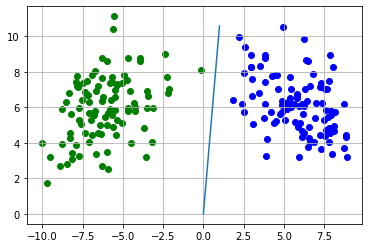

In [24]:
app = plotPercApp(1,2,2,1)

## 1 vs 2 DEC

Points Mal Classées =  0
l'erreur =  0.0


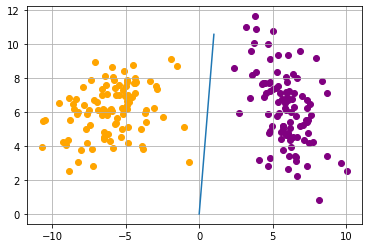

In [25]:
print
plotPercDec(1,2,2,app,1)

err,right = calcError(app,Y[Y["Classe"] == 1],Y[Y["Classe"] == 2])
print("l'erreur = ",err)

## 1 vs 3 APP

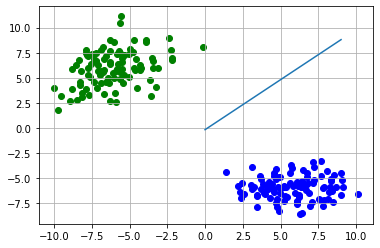

In [26]:
app = plotPercApp(1,3,10,1)

## 1 vs 3 DEC

Points Mal Classées =  0
l'erreur =  0.0


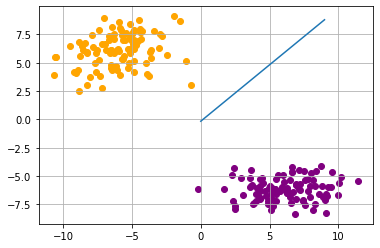

In [27]:
plotPercDec(1,3,10,app,1)

err,right = calcError(app,Y[Y["Classe"] == 1],Y[Y["Classe"] == 3])
print("l'erreur = ",err)

## 1 vs 4 APP

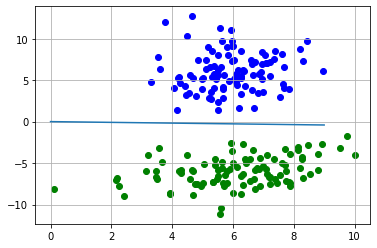

In [29]:
app = plotPercApp(1,4,10,-1)

## 1 vs 4 DEC

Points Mal Classées =  0
l'erreur =  0.0


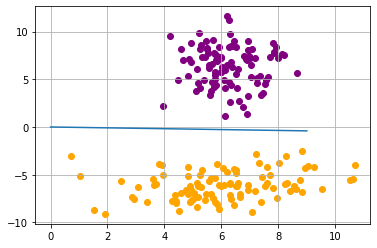

In [30]:
plotPercDec(1,4,10,app,-1)
err,right = calcError(app,Y[Y["Classe"] == 1],Y[Y["Classe"] == 4])
print("l'erreur = ",err)

## 1 vs 5 APP

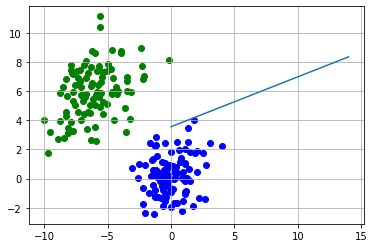

In [31]:
app = plotPercApp(1,5,15,1)

## 1 vs 5 DEC

Points Mal Classées =  1
l'erreur =  0.005


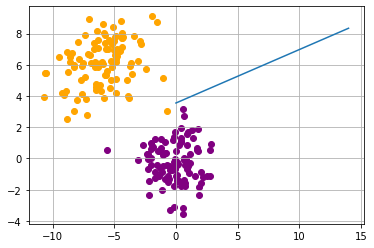

In [32]:
plotPercDec(1,5,15,app,1)
err,right = calcError(app,Y[Y["Classe"] == 1],Y[Y["Classe"] == 5])
print("l'erreur = ",err)

## 2 vs 3 APP

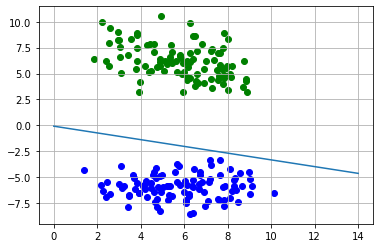

In [33]:
app = plotPercApp(2,3,15,1)

## 2 vs 3 DEC

Points Mal Classées =  0
l'erreur =  0.0


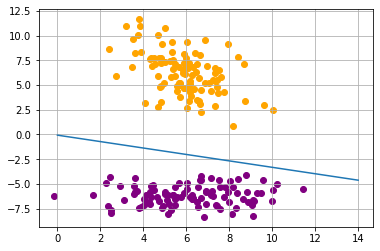

In [34]:
plotPercDec(2,3,15,app,1)
err,right = calcError(app,Y[Y["Classe"] == 2],Y[Y["Classe"] == 3])
print("l'erreur = ",err)

## 2 vs 4 APP

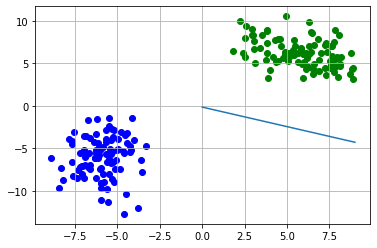

In [35]:
app = plotPercApp(2,4,10,1)

## 2 vs 4 DEC

Points Mal Classées =  0
l'erreur =  0.0


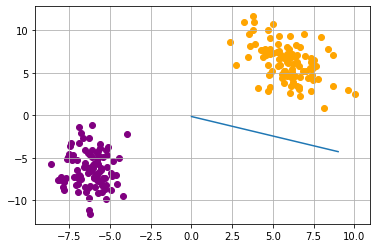

In [36]:
plotPercDec(2,4,10,app,1)
err,right = calcError(app,Y[Y["Classe"] == 2],Y[Y["Classe"] == 4])
print("l'erreur = ",err)

## 2 vs 5 APP

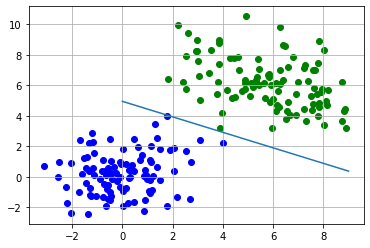

In [37]:
app = plotPercApp(2,5,10,1)

## 2 vs 5 DEC

Points Mal Classées =  0
l'erreur =  0.0


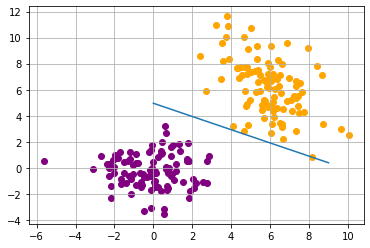

In [38]:
plotPercDec(2,5,10,app,1)
err,right = calcError(app,Y[Y["Classe"] == 2],Y[Y["Classe"] == 5])
print("l'erreur = ",err)

## 3 vs 4 APP

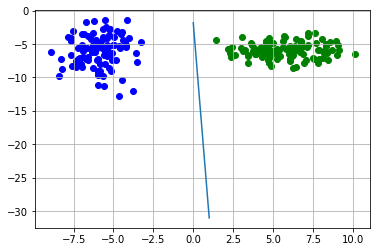

In [39]:
app = plotPercApp(3,4,2,1)

## 3 vs 4 DEC

Points Mal Classées =  1
l'erreur =  0.005


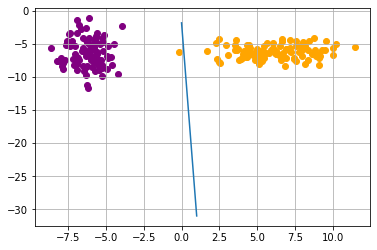

In [40]:
plotPercDec(3,4,2,app,1)
err,right = calcError(app,Y[Y["Classe"] == 3],Y[Y["Classe"] == 4])
print("l'erreur = ",err)

## 3 vs 5 APP

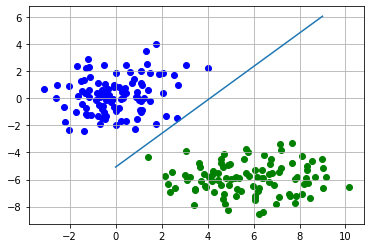

In [41]:
app = plotPercApp(3,5,10,1)

## 3 vs 5 DEC

Points Mal Classées =  0
l'erreur =  0.0


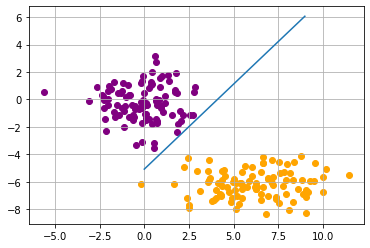

In [42]:
plotPercDec(3,5,10,app,1)
err,right = calcError(app,Y[Y["Classe"] == 3],Y[Y["Classe"] == 5])
print("l'erreur = ",err)

## 4 vs 5 APP

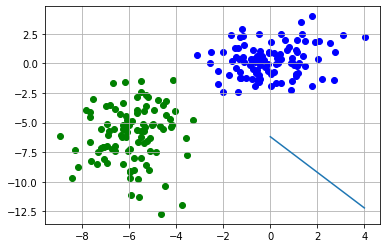

In [43]:
app = plotPercApp(4,5,5,1)

## 4 vs 5 DEC

Points Mal Classées =  1
l'erreur =  0.005


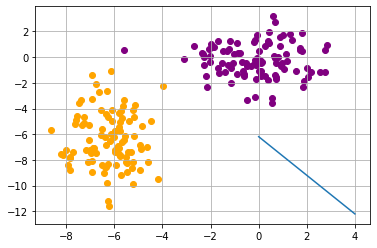

In [44]:
plotPercDec(4,5,5,app,1)
err,right = calcError(app,Y[Y["Classe"] == 4],Y[Y["Classe"] == 5])
print("l'erreur = ",err)

## Perceptron sur des jeux de données non-linéairement separable

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("data_tp2_app.txt",names=["Classe","x","y"],sep=" ")
Y = pd.read_csv("data_tp2_dec.txt",names=["Classe","x","y"],sep=" ")

def f(x,a,b):
    return (a * x) + b

def oneVsOneNonLinear(X,Y):
    a= np.array([0, 0, 0])
    class1 = []
    class2 = []
    iter = 0
    error = 0
    
    for i in range(len(X['x'])):
        class1.append(np.array([X['x'].tolist()[i],X['y'].tolist()[i],1]))
        class2.append(np.array([-Y['x'].tolist()[i],-Y['y'].tolist()[i], -1]))
        classes = class1 + class2
    
        
    a = classes[0]   
    isNeg = True
    while(isNeg and iter < 2000):
        isNeg = False
        iter+=1
        for i in range (len(classes)):
            prod = a.T@classes[i]
            if prod <= 0:
                a += classes[i]
                isNeg = True
    
    
    return a

def plotPercApp1(class1,class2,xrange,sign):
    a = oneVsOneNonLinear(X[X["Classe"] == class1],X[X["Classe"] == class2])
    plt.scatter(sign*X[X["Classe"] == class1]['x'], sign*X[X["Classe"] == class1]['y'],c='green')
    plt.scatter(sign*X[X["Classe"] == class2]['x'], sign*X[X["Classe"] == class2]['y'],c='blue')
    plt.plot([f(x,-a[0]/a[1],-a[2]/a[1]) for x in range (xrange)])
    plt.grid()
    return a
    
def plotPercDec1(class1,class2,xrange,app,sign):
    plt.scatter(sign*Y[Y["Classe"] == class1]['x'], sign*Y[Y["Classe"] == class1]['y'],c='orange')
    plt.scatter(sign*Y[Y["Classe"] == class2]['x'], sign*Y[Y["Classe"] == class2]['y'],c='purple')
    plt.plot([f(x,-app[0]/app[1],-app[2]/app[1]) for x in range (xrange)])
    plt.grid()
    

## data_tp3_app

## 3 vs 5 APP

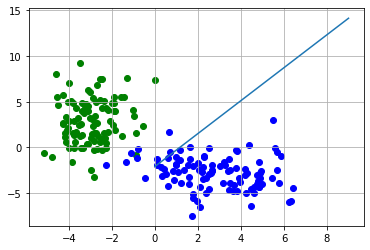

In [103]:
app = plotPercApp1(5,3,10,-1)

## 3 vs 5 DEC

Points Mal Classées =  5
l'erreur =  0.025


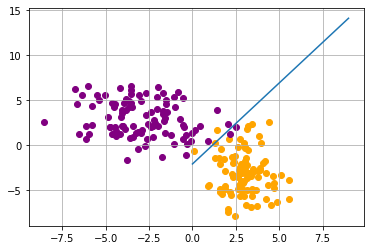

In [105]:
plotPercDec1(5,3,10,app,1)
err,right = calcError(app,Y[Y["Classe"] == 5],Y[Y["Classe"] == 3])
print("l'erreur = ",err)

## 4 vs 5 APP

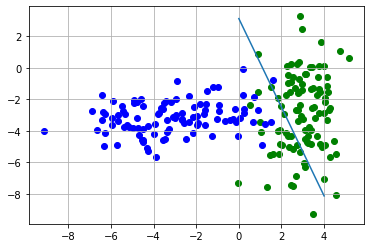

In [120]:
app = plotPercApp1(5,4,5,1)

## 4 vs 5 DEC

Points Mal Classées =  25
l'erreur =  0.125


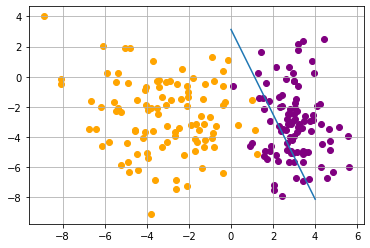

In [124]:
plotPercDec1(4,5,5,app,1)
err,right = calcError(app,Y[Y["Classe"] == 5],Y[Y["Classe"] == 4])
print("l'erreur = ",err)

## 2 vs 5 APP

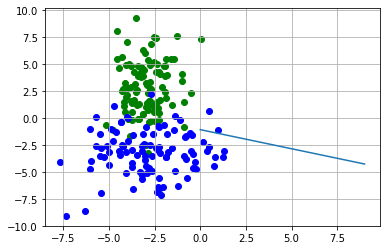

In [199]:
app = plotPercApp1(5,2,10,-1)

## 2 vs 5 DEC

Points Mal Classées =  28
l'erreur =  0.14


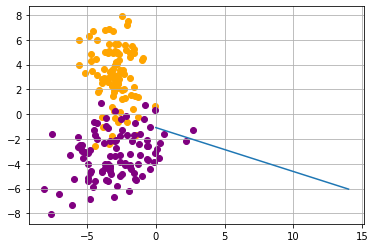

In [137]:
plotPercDec1(5,2,15,app,-1)
err,right = calcError(app,Y[Y["Classe"] == 5],Y[Y["Classe"] == 2])
print("l'erreur = ",err)

## 1 vs 5 APP

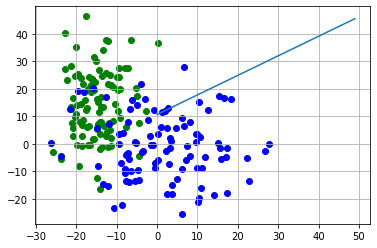

In [156]:
app = plotPercApp1(5,1,50,-1)

## 1 vs 5 DEC


Points Mal Classées =  100
l'erreur =  0.5


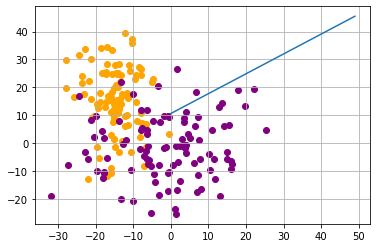

In [159]:
plotPercDec1(5,1,50,app,-1)
err,right = calcError(app,Y[Y["Classe"] == 5],Y[Y["Classe"] == 1])
print("l'erreur = ",err)

# data_tp2_app

## 5 vs 4 APP

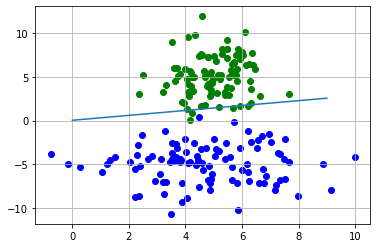

In [206]:
app = plotPercApp1(5,4,10,-1)

## 5 vs 4 DEC

Points Mal Classées =  2
l'erreur =  0.01


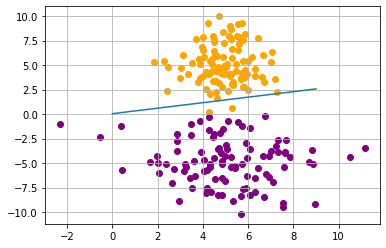

In [207]:
plotPercDec1(5,4,10,app,-1)
err,right = calcError(app,Y[Y["Classe"] == 5],Y[Y["Classe"] == 4])
print("l'erreur = ",err)

## 3 vs 4 APP

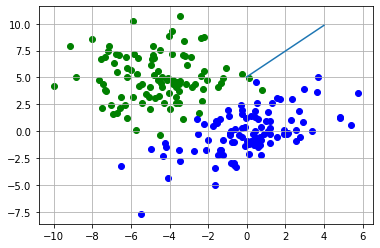

In [254]:
app = plotPercApp1(4,3,5,1)

## 3 vs 4 DEC

Points Mal Classées =  6
l'erreur =  0.03


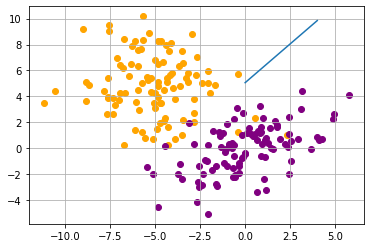

In [255]:
plotPercDec1(4,3,5,app,1)
err,right = calcError(app,Y[Y["Classe"] == 4],Y[Y["Classe"] == 3])
print("l'erreur = ",err)

## One Vs ALL

## 1 VS ALL APP

[-12.527644   1.184328   0.      ]


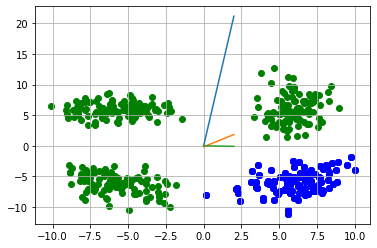

In [24]:
X = pd.read_csv("data_tp1_app.txt",names=["Classe","x","y"],sep=" ")
Y = pd.read_csv("data_tp1_dec.txt",names=["Classe","x","y"],sep=" ")

j = 0
frt_des = []
for i in range(2,5):
    app = plotPercApp(1,i,3,-1)
    frt_des.append(app)
    j+=1
print(frt_des[0])

## 1 VS ALL DEC

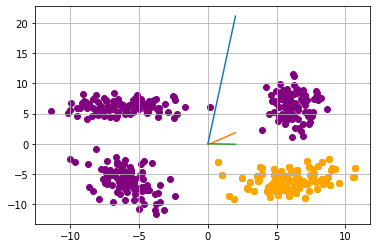

In [22]:
j = 0
for i in range(2,5):
    plotPercDec(1,i,3,frt_des[j],-1)
    j+=1

## 2 VS ALL APP

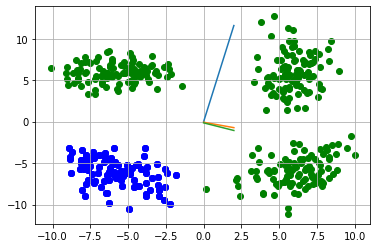

In [30]:
j = 0
frt_des = []
for i in range(1,5):
    if i == 2:
        continue
    app = plotPercApp(2,i,3,-1)
    frt_des.append(app)
    j+=1

## 2 VS ALL DEC

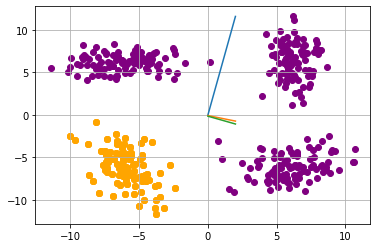

In [31]:
j = 0
for i in range(1,5):
    if i == 2:
        continue
    plotPercDec(2,i,3,frt_des[j],-1)
    j+=1

## 3 vs ALL APP

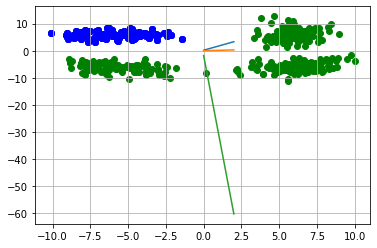

In [32]:
j = 0
frt_des = []
for i in range(1,5):
    if i == 3:
        continue
    app = plotPercApp(3,i,3,-1)
    frt_des.append(app)
    j+=1

## 3 vs ALL DEC

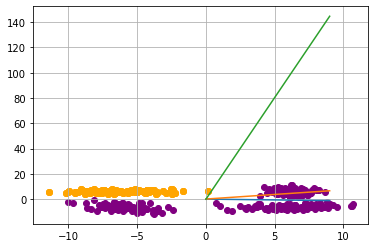

In [46]:
j = 0
for i in range(1,5):
    if i == 3:
        continue
    plotPercDec(3,i,10,frt_des[j],-1)
    j+=1

## 4 vs ALL APP

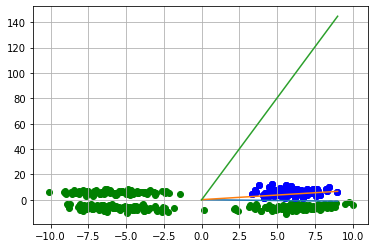

In [47]:
j = 0
frt_des = []
for i in range(1,5):
    if i == 4:
        continue
    app = plotPercApp(4,i,10,-1)
    frt_des.append(app)
    j+=1

## 4 vs ALL DEC

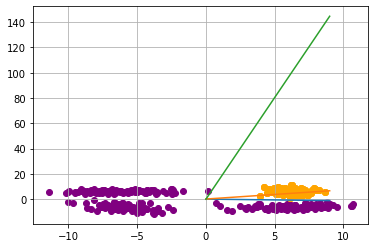

In [49]:
j = 0
for i in range(1,5):
    if i == 4:
        continue
    plotPercDec(4,i,10,frt_des[j],-1)
    j+=1

    Avec la method one vs one dans le cas de séparation Linéaire on a obtenue des bonnes résultats et les classes seront bien Séparées, dans ce cas la séparation en utilisant le One Vs All est efficace et plus rapide.
    
    Pour les cas des classes non linéairement separables avec le one vs one one a obtenu des resultat avec des erreurs.
    
    Donc en Conclusion pour des classes non Linéairement séparable le perceptron donne des erreures, donc c'est mieux d'utiliser le Perceptron pour des classes linéairement separables.

# TP2 Arbres de Décision

### Construire et visualiser un arbre de décision

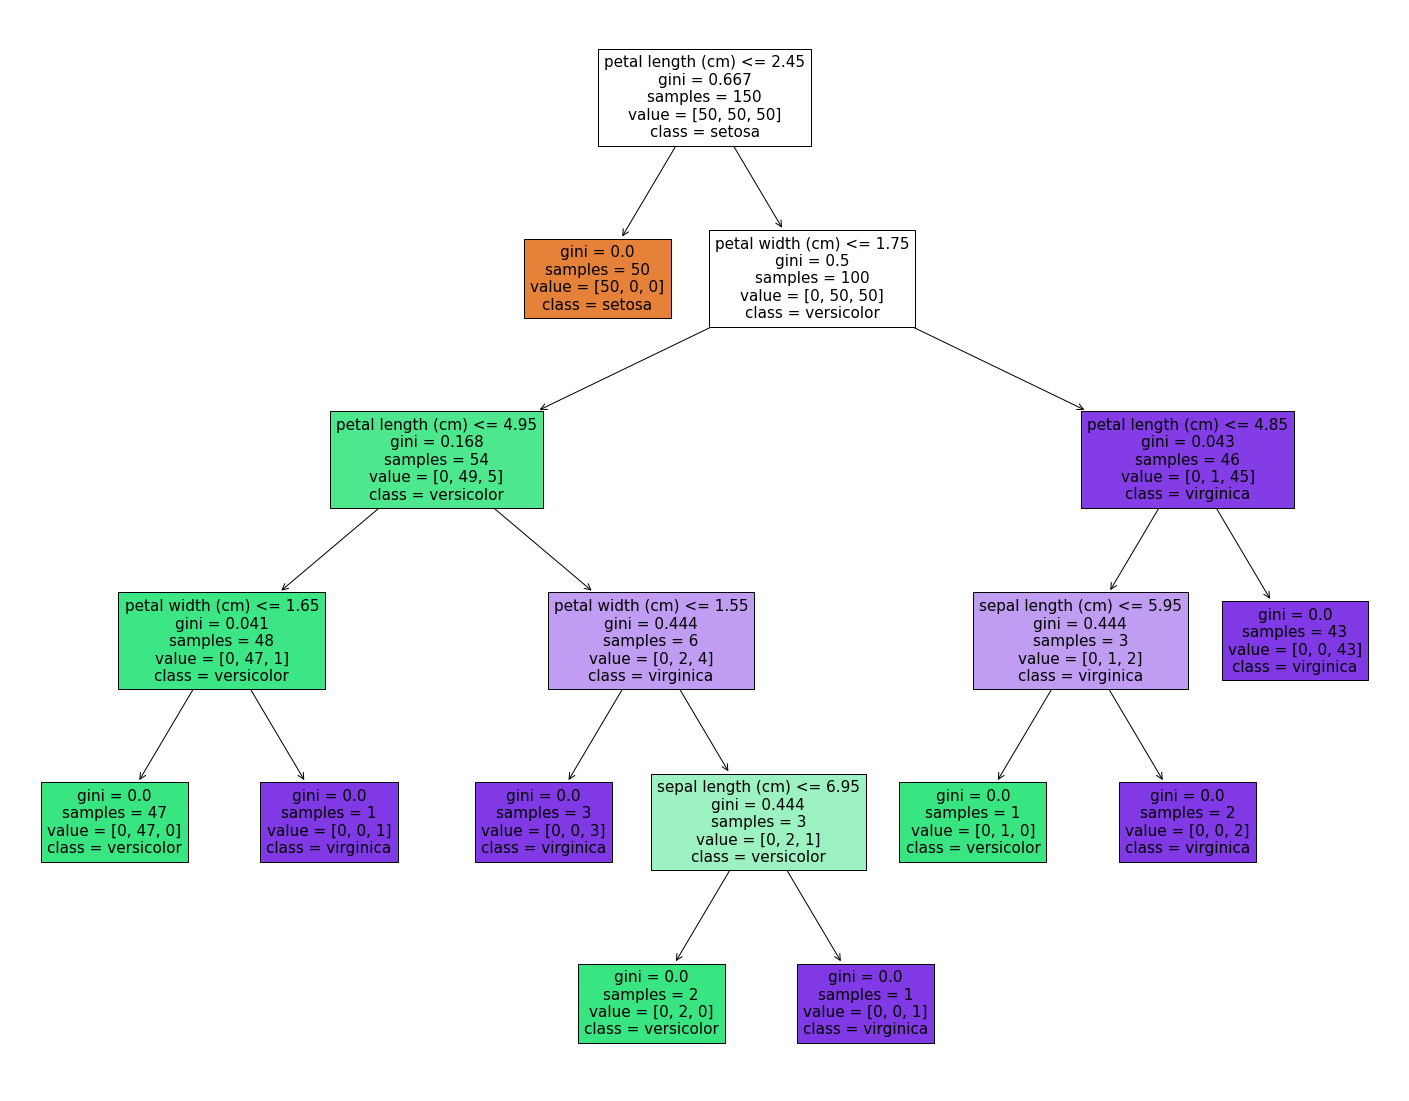

In [1]:
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris

iris = datasets.load_iris()

X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

    J'ai utiliser plot_tree parceque graphviz ne marche pas sur mon ordinateur mais j'ai eu le même resultat.

In [2]:
import sys
!{sys.executable} -m pip install graphviz

# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=iris.feature_names,  
#                                 class_names=iris.target_names,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

# 3 Comparaison de classifieurs

   ## Arbre de décision

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

## GaussianNB

In [4]:
from sklearn.naive_bayes import GaussianNB
clf_gauss = GaussianNB()
clf_gauss.fit(X_train, y_train)

GaussianNB()

## KNeighborsClassifier

In [5]:

from sklearn import neighbors
clf_knn = neighbors.KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

## score

In [6]:
score_dt = clf_dt.score(X_train, y_train)
score_gauss = clf_gauss.score(X_train, y_train)
score_knn = clf_knn.score(X_train, y_train)

print("DecisionTree: ", score_dt)
print("Gaussian: ", score_gauss)
print("Knn: ", score_knn)

DecisionTree:  1.0
Gaussian:  0.95
Knn:  0.96


## Cross validation Score

In [7]:
from sklearn.model_selection import cross_val_score

score_cv_dt = cross_val_score(clf_dt, X_train, y_train, cv=5)
score_cv_gauss = cross_val_score(clf_gauss, X_train, y_train, cv=5)
score_cv_knn = cross_val_score(clf_knn, X_train, y_train, cv=5)

print("DecisionTree Cross Val: ", score_cv_dt )
print("Accuracy mean: " , score_cv_dt.mean() , " Std:" , score_cv_dt.std())
print(" \n \n" )
print("Gaussian Cross Val: ", score_cv_gauss )
print("Accuracy-mean: " , score_cv_gauss.mean() , " Std:" , score_cv_gauss.std())
print(" \n \n" )
print("Knn Cross Val: ", score_cv_knn)
print("Accuracy mean: " , score_cv_knn.mean() , " Std:" , score_cv_knn.std())
print(" \n \n" )

DecisionTree Cross Val:  [0.95 0.8  0.9  1.   0.95]
Accuracy mean:  0.9199999999999999  Std: 0.06782329983125265
 
 

Gaussian Cross Val:  [1.  0.8 0.9 1.  0.9]
Accuracy-mean:  0.9200000000000002  Std: 0.0748331477354788
 
 

Knn Cross Val:  [0.9  0.9  0.9  1.   0.95]
Accuracy mean:  0.93  Std: 0.03999999999999998
 
 



    Le meilleure classifieur dans ce cas est le K plus proche Voisin  

## Test sur different base

In [58]:
import sklearn.tree as tree
import matplotlib.pyplot as plt

digits=datasets.load_digits()

digitsTrain,digitsTest,labelTrain,labelTest=train_test_split(digits.data,digits.target,test_size=0.33)

model_dt = tree.DecisionTreeClassifier()
model_knn = neighbors.KNeighborsClassifier()
model_gaus = GaussianNB()

cross_val_dt = cross_val_score(model_dt, digitsTrain, labelTrain,cv=5)
cross_val_knn = cross_val_score(model_knn, digitsTrain, labelTrain,cv=5)
cross_val_gaus = cross_val_score(model_gaus, digitsTrain, labelTrain,cv=5)

print("DecisionTree Cross Val: ", cross_val_dt )
print("Accuracy mean: " , cross_val_dt.mean() , " Std:" , cross_val_dt.std())
print(" \n \n" )
print("Gaussian Cross Val: ", cross_val_gaus )
print("Accuracy-mean: " , cross_val_gaus.mean() , " Std:" , cross_val_gaus.std())
print(" \n \n" )
print("Knn Cross Val: ", cross_val_knn)
print("Accuracy mean: " , cross_val_knn.mean() , " Std:" , cross_val_knn.std())
print(" \n \n" )

DecisionTree Cross Val:  [0.84647303 0.85477178 0.80912863 0.875      0.8375    ]
Accuracy mean:  0.8445746887966805  Std: 0.02163219022024746
 
 

Gaussian Cross Val:  [0.87136929 0.81742739 0.81742739 0.8        0.81666667]
Accuracy-mean:  0.8245781466113415  Std: 0.0243242886602301
 
 

Knn Cross Val:  [0.98340249 0.98340249 0.98340249 0.99583333 0.97083333]
Accuracy mean:  0.9833748271092668  Std: 0.00790576674474363
 
 



     Dans ce cas le KNeighborsClassifier a obtenu le meilleur resultat

## Breast Cancer

In [62]:
cancer=datasets.load_breast_cancer()

cancerTrain,cancerTest,labelTrain,labelTest=train_test_split(cancer.data,cancer.target,test_size=0.33)

model_dt = tree.DecisionTreeClassifier()
model_knn = neighbors.KNeighborsClassifier()
model_gaus = GaussianNB()

cross_val_dt = cross_val_score(model_dt, cancerTrain, labelTrain,cv=5)
cross_val_knn = cross_val_score(model_knn, cancerTrain, labelTrain,cv=5)
cross_val_gaus = cross_val_score(model_gaus, cancerTrain, labelTrain,cv=5)
print(" \n \n" )
print("DecisionTree Cross Val: ", cross_val_dt )
print("Accuracy mean: " , cross_val_dt.mean() , " Std:" , cross_val_dt.std())
print(" \n \n" )
print("Gaussian Cross Val: ", cross_val_gaus )
print("Accuracy-mean: " , cross_val_gaus.mean() , " Std:" , cross_val_gaus.std())
print(" \n \n" )
print("Knn Cross Val: ", cross_val_knn)
print("Accuracy mean: " , cross_val_knn.mean() , " Std:" , cross_val_knn.std())
print(" \n \n" )

 
 

DecisionTree Cross Val:  [0.93506494 0.92105263 0.94736842 0.88157895 0.97368421]
Accuracy mean:  0.9317498291182501  Std: 0.030479403197168402
 
 

Gaussian Cross Val:  [0.94805195 0.93421053 0.96052632 0.94736842 0.98684211]
Accuracy-mean:  0.9553998632946001  Std: 0.01778976683204362
 
 

Knn Cross Val:  [0.96103896 0.92105263 0.93421053 0.92105263 0.90789474]
Accuracy mean:  0.92904989747095  Std: 0.018029895300635763
 
 



    Dans ce cas le classifieur Gaussian a obtenu le meilleur resultat
    
    
    Donc on peut conclure que il n'existe pas une méthode un classification qui est l'optimal pour tout les problems mais le score dépend du problème et données 



# 4 Visualiser les frontières de décision

    fonction python plot_decision_frontiers qui prend en paramètre un classifieur, sa base d’apprentissage et affiche une figure dans laquelle seront dessinés les points (2D) de la base d’apprentissage et les frontières de décision du classifieur 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


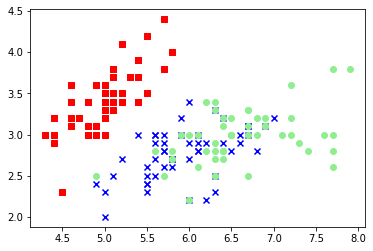

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_frontiers(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)



In [10]:
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

class_dt=tree.DecisionTreeClassifier()
class_knn=neighbors.KNeighborsClassifier()
class_gauss=GaussianNB()

class_dt.fit(X,y)
class_knn.fit(X,y)
class_gauss.fit(X,y)



GaussianNB()

### Decision Tree Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


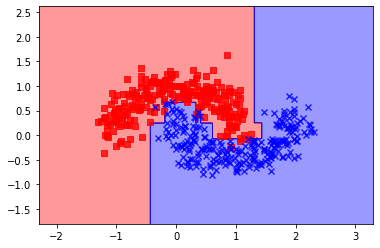

In [68]:
plot_dt = plot_decision_frontiers(X, y, class_dt)

### K nearest neighbour Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


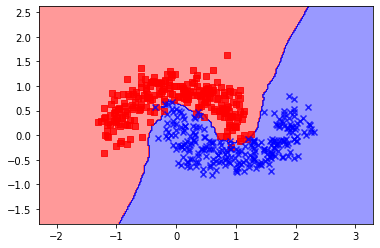

In [70]:
plot_knn = plot_decision_frontiers(X, y, class_knn)

### Gaussian Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


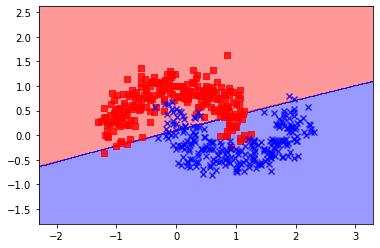

In [72]:
plot_gauss = plot_decision_frontiers(X, y, class_gauss)


## 5 Étude de paramètres

In [11]:
moon_ep=datasets.make_moons(n_samples=1000,noise=0.3)


model_entropy=tree.DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(moon_ep[0],moon_ep[1])
model_gini=tree.DecisionTreeClassifier(criterion="gini")
model_gini.fit(moon_ep[0],moon_ep[1])

cross_val_entropy=cross_val_score(model_entropy,moon_ep[0],moon_ep[1],cv=5)
cross_val_gini=cross_val_score(model_gini,moon_ep[0],moon_ep[1],cv=5)

import numpy as np
moyen_entropy=np.mean(cross_val_entropy)
moyen_gini=np.mean(cross_val_gini)

sd_entropy=np.std(moyen_entropy)
sd_gini=np.std(moyen_gini)




## Classification en Entropy

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


 
 

Entropy Cross Val:  [0.91  0.9   0.845 0.905 0.89 ]
Accuracy mean:  0.89  Std: 0.02345207879911717
 
 



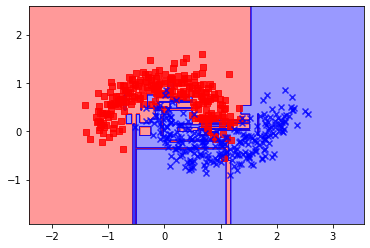

In [12]:
plot_decision_frontiers(X, y, model_entropy)
print(" \n \n" )
print("Entropy Cross Val: ", cross_val_entropy )
print("Accuracy mean: " , cross_val_entropy.mean() , " Std:" , cross_val_entropy.std())
print(" \n \n" )

## Classification en Gini

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


 
 

Gini Cross Val:  [0.9   0.88  0.82  0.895 0.86 ]
Accuracy mean:  0.8710000000000001  Std: 0.029051678092667926
 
 



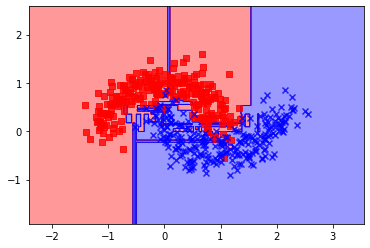

In [13]:
plot_decision_frontiers(X, y, model_gini)
print(" \n \n" )
print("Gini Cross Val: ", cross_val_gini )
print("Accuracy mean: " , cross_val_gini.mean() , " Std:" , cross_val_gini.std())
print(" \n \n" )

    La Precision des deux criteres est tres proche mais en utilisant L'Entropy on a obtenir un resultat en peu plus mieux que Gini, mais les 2 manières sont Très efficaces



5


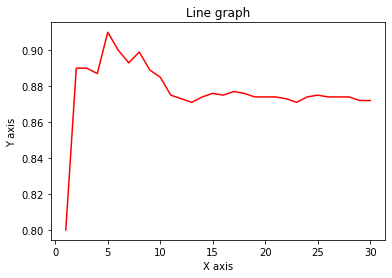

In [14]:
valeur=[]
for i in range(30):
    model_entropy=tree.DecisionTreeClassifier(max_depth=i+1)
    x=cross_val_score(model_entropy,moon_ep[0],moon_ep[1],cv=5)
    valeur.append(np.mean(x))
print(valeur.index(max(valeur))+1)

# importing the library
import numpy as np
import matplotlib.pyplot as plt

# data to be plotted
x = np.arange(1, 31)
y = np.array(valeur)

# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()



    On notte que lorsque le max depth est 5 on a obtenu la meilleur précision.

12


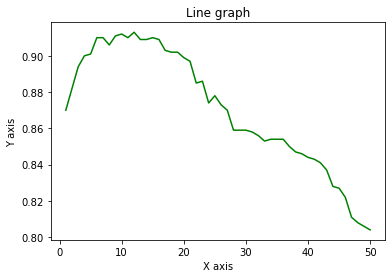

In [15]:
valeur=[]
for i in range(50):
    moyen_entropy=tree.DecisionTreeClassifier(min_samples_leaf=((i+1)*2))
    x=cross_val_score(moyen_entropy,moon_ep[0],moon_ep[1],cv=5)
    valeur.append(np.mean(x))
print((valeur.index(max(valeur))+1))

# importing the library
import numpy as np
import matplotlib.pyplot as plt

# data to be plotted
x = np.arange(1, 51)
y = np.array(valeur)

# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()


    Nombre minimum de données par feuille en 12% nous donne la meilleure Précision.



# TP3- MLP

### MLP sur XOR
#### Initialisation des poids 

Poids du couche d'entree au couche cache

In [84]:
from random import seed
from random import random
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

seed(1)
entreeToHiddenW=[]

for i in range(3):
    entreeToHiddenW.append([])
    for j in range(3):
        entreeToHiddenW[i].append(random())

Poids du couche cache au couche sortie

In [89]:
hiddenToSortieW=[]
for i in range(4):
    hiddenToSortieW.append([])
    for j in range(2):
        hiddenToSortieW[i].append(random())

L'entrée du XOR

In [90]:
learning_rate=1
Xor=[[0,0,1],[0,1,0],[1,0,0],[1,1,1]]

Calcul des sortie de couche entre vers cache

In [91]:
FirstEntreeVal=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+(entreeToHiddenW[j][i]*Xor[0][j])
    x=x+entreeToHiddenW[2][i]
    FirstEntreeVal.append(sigmoid(x))
FirstEntreeVal

[0.6573693455986976, 0.6875571436044838, 0.5234476854499522]

Calcul des sorties de couche cache vers sortie

In [97]:
FirstHiddenVal=[]
for i in range(2):
    x=0
    for j in range(3):
        x=x+hiddenToSortieW[j][i]*FirstEntreeVal[j]
    x=x+hiddenToSortieW[3][i]
    FirstHiddenVal.append(x)
FirstHiddenVal

[1.0388292922383875, 1.5354165926868926]

### Back propagation 1er Point
Calcul de Delta couche sortie

In [98]:
deltaSortie=[]
for i in range(2):
    if(i==0):
        x=(FirstHiddenVal[i]-1)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
    else:
        x=(FirstHiddenVal[i]-0)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x) 
deltaSortie

[-0.001566257400756608, -1.2622468194803873]

Calcul de delta de couche cache

In [99]:
deltaHidden=[]
for i in range(4):
    x=0
    for j in range(2):
        x=x+deltaSortie[j]*hiddenToSortieW[i][j]
    if(i<3):
        x=x*(FirstEntreeVal[i])*(1-FirstEntreeVal[i])
    else:
        x=x*(sigmoid(1))*(1-sigmoid(1))
    deltaHidden.append(x)

deltaHidden

[-0.23761970956585476,
 -0.20684455475216815,
 -0.140238877249359,
 -0.056994752675735276]

Calcul de delta couche entree

In [100]:
deltaEntree=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+deltaHidden[j]*entreeToHiddenW[i][j]
    if(i<2):
        x=x*(Xor[0][i])*(1-Xor[0][i])
    else:
        x=x*(1)*(1-1)
    deltaEntree.append(x)
deltaEntree

[-0.0, -0.0, -0.0]

Tous les delta de tous les neurones sont calculer

### Calcul de nouveau poids 

Entree vers cache

In [101]:
for i in range(len(entreeToHiddenW)):
    for j in range(len(entreeToHiddenW[i])):
        entreeToHiddenW[i][j]=entreeToHiddenW[i][j]-1*deltaEntree[i]*Xor[0][i]
entreeToHiddenW

[[0.13436424411240122, 0.8474337369372327, 0.763774618976614],
 [0.2550690257394217, 0.49543508709194095, 0.4494910647887381],
 [0.651592972722763, 0.7887233511355132, 0.0938595867742349]]

cache vers sortie

In [102]:
FirstEntreeVal.append(sigmoid(1))
for i in range(len(hiddenToSortieW)):
    for j in range(len(hiddenToSortieW[i])):
        hiddenToSortieW[i][j]=hiddenToSortieW[i][j]-1*deltaHidden[i]*FirstEntreeVal[i]
hiddenToSortieW

[[0.18455138950066485, 0.9919690168985282],
 [0.5749845191405953, 0.904497533693484],
 [0.07551376905738762, 0.5187949097610783],
 [0.7632065352212742, 0.2704287241509443]]

On Répète cette procédure pour tous les points

In [130]:
FirstEntreeVal=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+(entreeToHiddenW[j][i]*Xor[1][j])
    x=x+entreeToHiddenW[2][i]
    FirstEntreeVal.append(sigmoid(x))

FirstHiddenVal=[]
for i in range(2):
    x=0
    for j in range(3):
        x=x+hiddenToSortieW[j][i]*FirstEntreeVal[j]
    x=x+hiddenToSortieW[3][i]
    FirstHiddenVal.append(x)
    
deltaSortie=[]
for i in range(2):
    if(i==0):
        x=(FirstHiddenVal[i]-0)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
    else:
        x=(FirstHiddenVal[i]-1)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
        
deltaHidden=[]
for i in range(4):
    x=0
    for j in range(2):
        x=x+deltaSortie[j]*hiddenToSortieW[i][j]
    if(i<3):
        x=x*(FirstEntreeVal[i])*(1-FirstEntreeVal[i])
    else:
        x=x*(sigmoid(1))*(1-sigmoid(1))
    deltaHidden.append(x)
    
deltaEntree=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+deltaHidden[j]*entreeToHiddenW[i][j]
    if(i<2):
        x=x*(Xor[1][i])*(1-Xor[1][i])
    else:
        x=x*(1)*(1-1)
    deltaEntree.append(x)

for i in range(len(entreeToHiddenW)):
    for j in range(len(entreeToHiddenW[i])):
        entreeToHiddenW[i][j]=entreeToHiddenW[i][j]-1*deltaEntree[i]*Xor[1][i]
        
FirstEntreeVal.append(sigmoid(1))
for i in range(len(hiddenToSortieW)):
    for j in range(len(hiddenToSortieW[i])):
        hiddenToSortieW[i][j]=hiddenToSortieW[i][j]-1*deltaHidden[i]*FirstEntreeVal[i]


In [131]:
FirstEntreeVal=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+(entreeToHiddenW[j][i]*Xor[2][j])
    x=x+entreeToHiddenW[2][i]
    FirstEntreeVal.append(sigmoid(x))

FirstHiddenVal=[]
for i in range(2):
    x=0
    for j in range(3):
        x=x+hiddenToSortieW[j][i]*FirstEntreeVal[j]
    x=x+hiddenToSortieW[3][i]
    FirstHiddenVal.append(x)


FirstHiddenVal
deltaSortie=[]
for i in range(2):
    if(i==0):
        x=(FirstHiddenVal[i]-0)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
    else:
        x=(FirstHiddenVal[i]-1)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
deltaSortie
deltaHidden=[]
for i in range(4):
    x=0
    for j in range(2):
        x=x+deltaSortie[j]*hiddenToSortieW[i][j]
    if(i<3):
        x=x*(FirstEntreeVal[i])*(1-FirstEntreeVal[i])
    else:
        x=x*(sigmoid(1))*(1-sigmoid(1))
    deltaHidden.append(x)

deltaHidden
deltaEntree=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+deltaHidden[j]*entreeToHiddenW[i][j]
    if(i<2):
        x=x*(Xor[2][i])*(1-Xor[2][i])
    else:
        x=x*(1)*(1-1)
    deltaEntree.append(x)
deltaEntree
for i in range(len(entreeToHiddenW)):
    for j in range(len(entreeToHiddenW[i])):
        entreeToHiddenW[i][j]=entreeToHiddenW[i][j]-1*deltaEntree[i]*Xor[2][i]
entreeToHiddenW
FirstEntreeVal.append(sigmoid(1))
for i in range(len(hiddenToSortieW)):
    for j in range(len(hiddenToSortieW[i])):
        hiddenToSortieW[i][j]=hiddenToSortieW[i][j]-1*deltaHidden[i]*FirstEntreeVal[i]
hiddenToSortieW

[[2.7631982725745132, 3.5706158999723767],
 [2.7616148105089815, 3.0911278250618706],
 [1.39603341813755, 1.8393145588412407],
 [2.269513628954874, 1.7767358178845436]]

In [132]:
FirstEntreeVal=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+(entreeToHiddenW[j][i]*Xor[3][j])
    x=x+entreeToHiddenW[2][i]
    FirstEntreeVal.append(sigmoid(x))

FirstHiddenVal=[]
for i in range(2):
    x=0
    for j in range(3):
        x=x+hiddenToSortieW[j][i]*FirstEntreeVal[j]
    x=x+hiddenToSortieW[3][i]
    FirstHiddenVal.append(x)


FirstHiddenVal
deltaSortie=[]
for i in range(2):
    if(i==0):
        x=(FirstHiddenVal[i]-1)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
    else:
        x=(FirstHiddenVal[i]-0)*FirstHiddenVal[i]*(1-FirstHiddenVal[i])
        deltaSortie.append(x)
deltaSortie
deltaHidden=[]
for i in range(4):
    x=0
    for j in range(2):
        x=x+deltaSortie[j]*hiddenToSortieW[i][j]
    if(i<3):
        x=x*(FirstEntreeVal[i])*(1-FirstEntreeVal[i])
    else:
        x=x*(sigmoid(1))*(1-sigmoid(1))
    deltaHidden.append(x)

deltaHidden
deltaEntree=[]
for i in range(3):
    x=0
    for j in range(2):
        x=x+deltaHidden[j]*entreeToHiddenW[i][j]
    if(i<2):
        x=x*(Xor[3][i])*(1-Xor[3][i])
    else:
        x=x*(1)*(1-1)
    deltaEntree.append(x)
deltaEntree
for i in range(len(entreeToHiddenW)):
    for j in range(len(entreeToHiddenW[i])):
        entreeToHiddenW[i][j]=entreeToHiddenW[i][j]-1*deltaEntree[i]*Xor[3][i]
entreeToHiddenW
FirstEntreeVal.append(sigmoid(1))
for i in range(len(hiddenToSortieW)):
    for j in range(len(hiddenToSortieW[i])):
        hiddenToSortieW[i][j]=hiddenToSortieW[i][j]-1*deltaHidden[i]*FirstEntreeVal[i]
hiddenToSortieW

[[438.43334211265073, 439.2407597400486],
 [238.72610185709877, 239.05561487165167],
 [207.76354907882072, 208.2068302195244],
 [268.8318297496064, 268.3390519385361]]

In [133]:
entreeToHiddenW

[[0.13436424411240122, 0.8474337369372327, 0.763774618976614],
 [0.2550690257394217, 0.49543508709194095, 0.4494910647887381],
 [0.651592972722763, 0.7887233511355132, 0.0938595867742349]]

In [137]:
FirstHiddenVal=[]
for i in range(2):
    x=0
    for j in range(3):
        x=x+hiddenToSortieW[j][i]*FirstEntreeVal[j]
    x=x+hiddenToSortieW[3][i]
    FirstHiddenVal.append(sigmoid(x))


FirstHiddenVal

[1.0, 1.0]

Le MLP dans mon cas class tous les points dans la classe 1 ce qui donne un taux de réussite trés faible!